In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
base_dir = '../data/training_curves/base-training/smoothed/'
downsample_dir = '../data/training_curves/downsampled-training/smoothed/'

In [3]:
def plot_curves(df_dict, title, palette=None, fig_size=(18,16), save_dir=None):
    for df in df_dict.values():
        df.columns = ['wall_time', 'step', 'accuracy']
    fig = plt.figure(figsize=fig_size)
    if palette:
        colors_ = sn.color_palette(palette)[:5]
    else:
        colors_ = sn.color_palette('YlOrRd')[:5] + sn.color_palette('Blues')[:5]
    for idx, item in enumerate(df_dict.items()):
        label, df = item
        if idx == 0:
            sn.lineplot(data=df, x='step', y='accuracy', label=label, color='black')
        else:
            sn.lineplot(data=df, x='step', y='accuracy', label=label, color=colors_[idx-1])

    plt.legend(fontsize=13, loc='lower right')
    plt.title(title, fontsize=18)
    plt.xlabel('Step', fontsize=13)
    plt.ylabel('Accuracy', fontsize=13)
    if save_dir:
        save_file = save_dir + title + '.png'
        fig.savefig(save_file, dpi = fig.dpi, facecolor=(1,1,1,1))

In [4]:
spanish_base = pd.read_csv(base_dir + 'spanish-base-train_accuracy.csv')
croatian_to_spanish = pd.read_csv(base_dir + 'croatian-to-spanish-train_accuracy.csv')
dutch_to_spanish = pd.read_csv(base_dir + 'dutch_2spanish.csv')
english_to_spanish = pd.read_csv(base_dir + 'english-to-spanish-train_accuracy.csv')
finnish_to_spanish = pd.read_csv(base_dir + 'finnish-to-spanish-train_accuracy.csv')
italian_to_spanish = pd.read_csv(base_dir + 'italian_2spanish.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_spanish_acc = pd.read_csv(base_dir + 'spanish_croatian2spanish-accelerated_learning.csv')
italian_spanish_acc = pd.read_csv(base_dir + 'spanish_italian2spanish-accelerated_learning.csv')
finnish_spanish_acc = pd.read_csv(base_dir + 'spanish_finnish2spanish-accelerated_learning.csv')
english_spanish_acc = pd.read_csv(base_dir + 'spanish_english2spanish-accelerated_learning.csv')
dutch_spanish_acc = pd.read_csv(base_dir + 'spanish_dutch2spanish-accelerated_learning.csv')

spanish_dfs = [spanish_base, croatian_to_spanish, dutch_to_spanish, english_to_spanish,
               finnish_to_spanish, italian_to_spanish, croatian_spanish_acc, italian_spanish_acc,
               finnish_spanish_acc, english_spanish_acc, dutch_spanish_acc]

In [5]:
labels = ['Spanish', 'Croatian-to-Spanish', 'Dutch-to-Spanish', 'English-to-Spanish', 'Finnish-to-Spanish',
          'Italian-to-Spanish', 'Spanish-to-Croatian-to-Spanish', 'Spanish-to-Italian-to-Spanish', 
          'Spanish-to-Finnish-to-Spanish', 'Spanish-to-English-to-Spanish', 'Spanish-to-Dutch-to-Spanish']

In [6]:
spanish_dict = dict(zip(labels, spanish_dfs))
spanish_transfer_learning = dict(zip(labels[:6], spanish_dfs[:6]))
spanish_accelerated_learning = dict(zip([labels[0]] + labels[6:], [spanish_dfs[0]] + spanish_dfs[6:]))

# Training

## Spanish full-data training

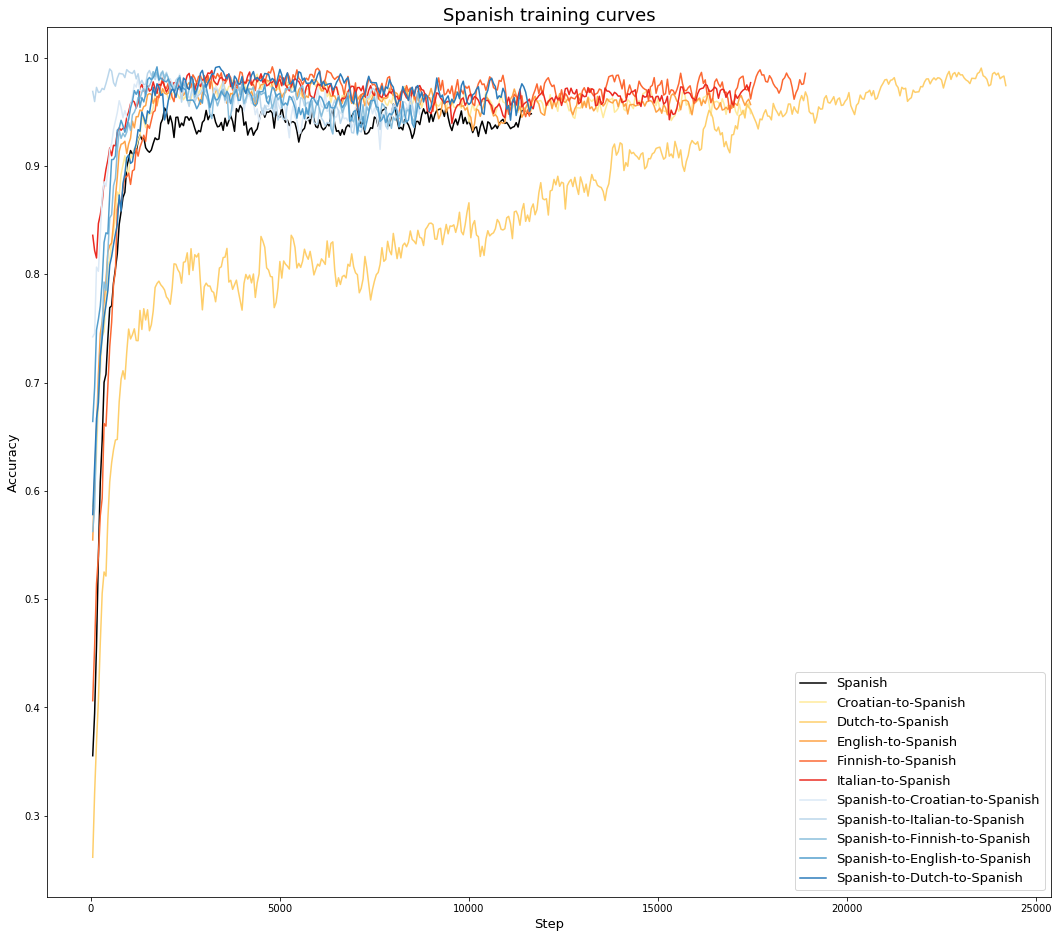

In [7]:
plot_curves(spanish_dict, 'Spanish training curves', save_dir='../graphs/smoothed/')

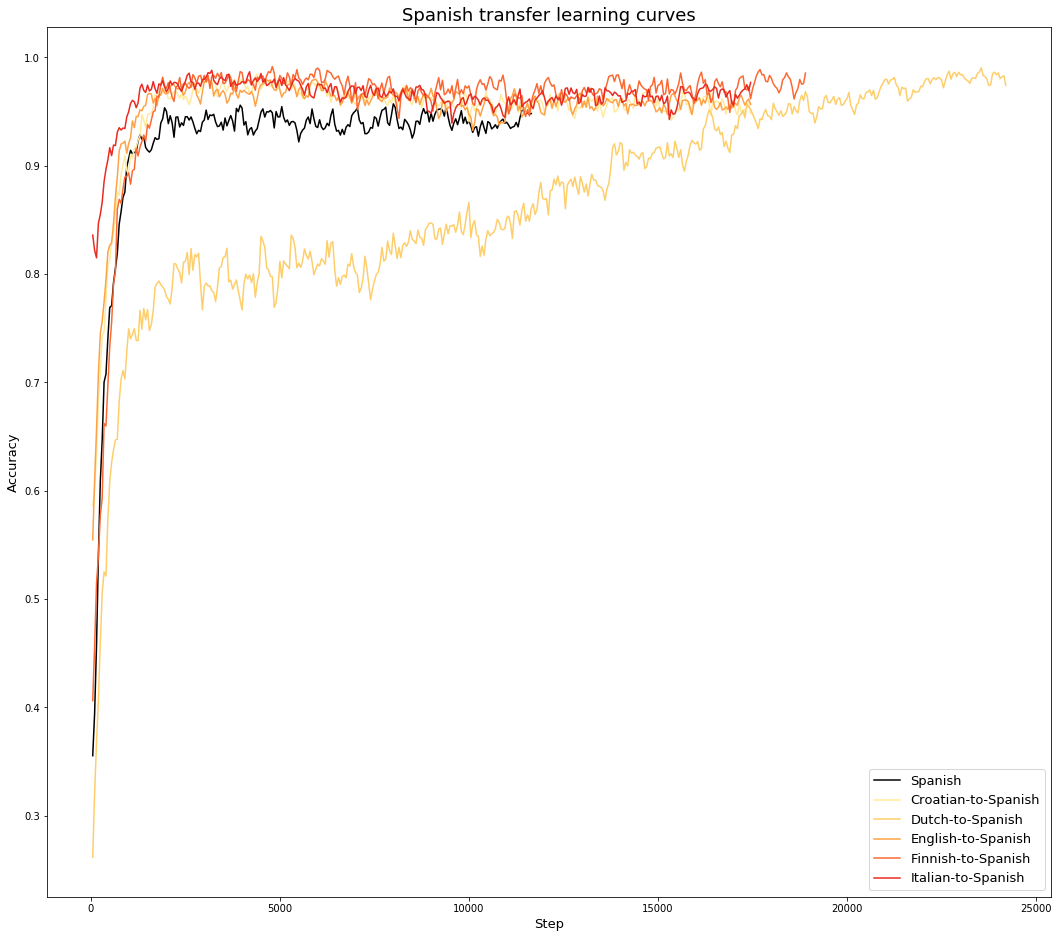

In [8]:
plot_curves(spanish_transfer_learning, 'Spanish transfer learning curves', palette='YlOrRd', save_dir='../graphs/smoothed/')

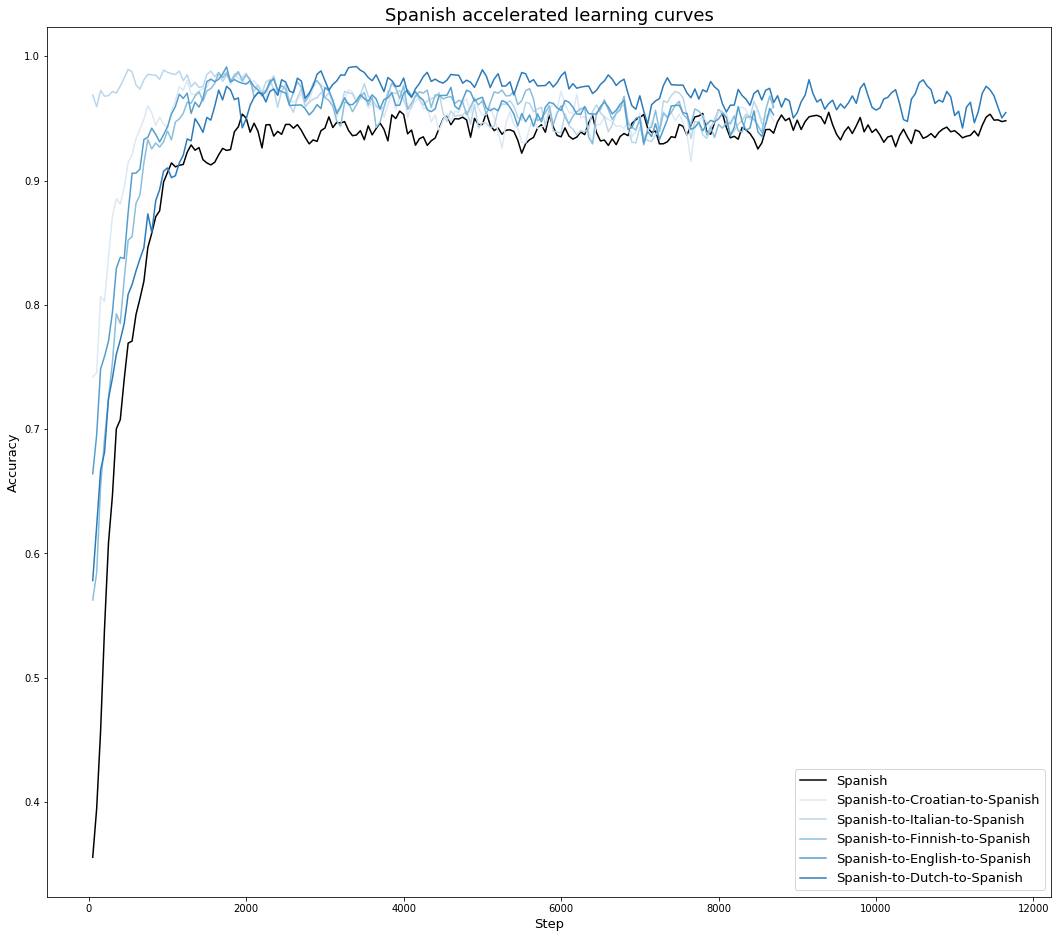

In [9]:
plot_curves(spanish_accelerated_learning, 'Spanish accelerated learning curves', palette='Blues', save_dir='../graphs/smoothed/')

## Spanish downsampled training

In [10]:
spanish_ds = pd.read_csv(downsample_dir + 'spanish-downsample-training.csv')
croatian_to_spanish_ds = pd.read_csv(downsample_dir + 'croatian-to-spanish-downsample-train.csv')
dutch_to_spanish_ds = pd.read_csv(downsample_dir + 'dutch_spanish_step.csv')
english_to_spanish_ds = pd.read_csv(downsample_dir + 'english-to-spanish-downsample-train.csv')
finnish_to_spanish_ds = pd.read_csv(downsample_dir + 'finnish-to-spanish-downsample-train.csv')
italian_to_spanish_ds = pd.read_csv(downsample_dir + 'italian_spanish_step.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_spanish_acc_ds = pd.read_csv(downsample_dir + 'spanish_croatian2spanish-downsample-accelerated_learning.csv')
italian_spanish_acc_ds = pd.read_csv(downsample_dir + 'spanish_italian2spanish-downsample-accelerated_learning.csv')
finnish_spanish_acc_ds = pd.read_csv(downsample_dir + 'spanish_finnish2spanish-downsample-accelerated_learning.csv')
english_spanish_acc_ds = pd.read_csv(downsample_dir + 'spanish_english2spanish-downsample-accelerated_learning.csv')
dutch_spanish_acc_ds = pd.read_csv(downsample_dir + 'spanish_dutch2spanish-downsample-accelerated_learning.csv')

spanish_dfs_ds = [spanish_ds, croatian_to_spanish_ds, dutch_to_spanish_ds, english_to_spanish_ds,
               finnish_to_spanish_ds, italian_to_spanish_ds, croatian_spanish_acc_ds, italian_spanish_acc_ds,
               finnish_spanish_acc_ds, english_spanish_acc_ds, dutch_spanish_acc_ds]

In [11]:
spanish_dict_ds = dict(zip(labels, spanish_dfs_ds))
spanish_transfer_learning_ds = dict(zip(labels[:6], spanish_dfs_ds[:6]))
spanish_accelerated_learning_ds = dict(zip([labels[0]] + labels[6:], [spanish_dfs_ds[0]] + spanish_dfs_ds[6:]))

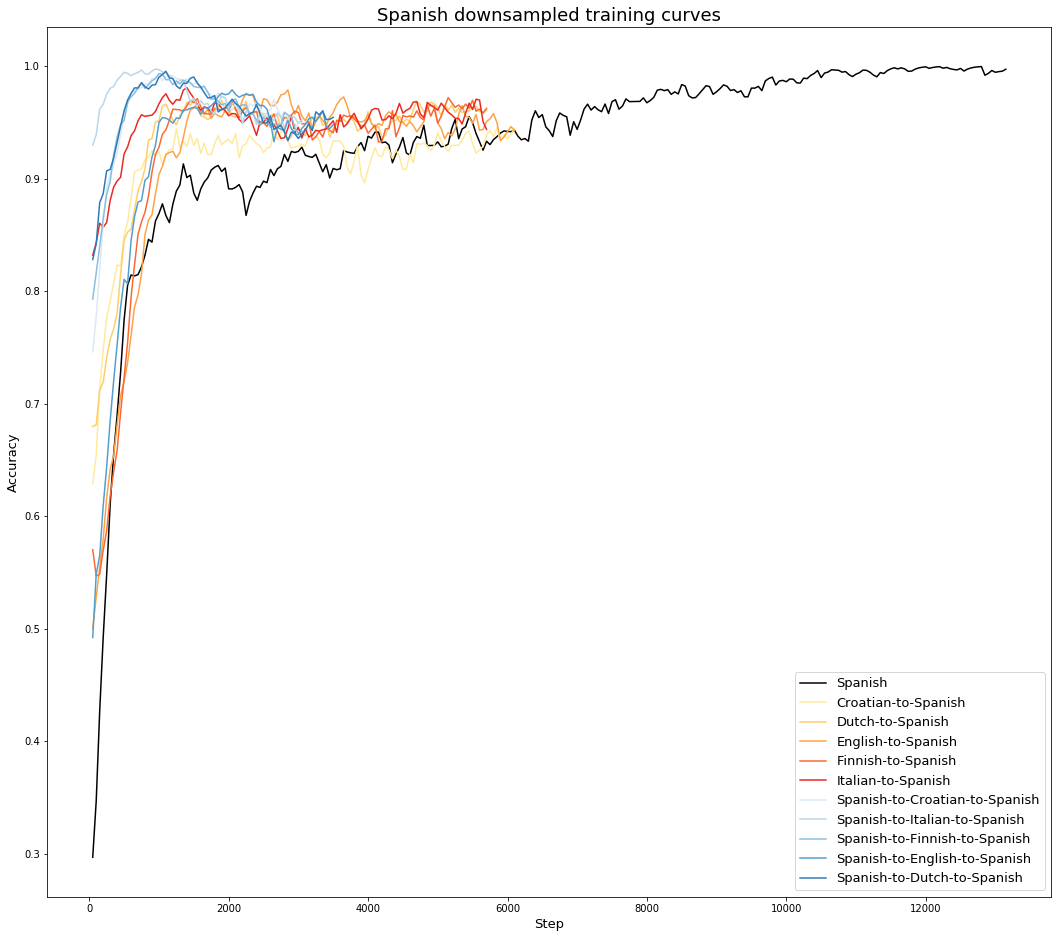

In [12]:
plot_curves(spanish_dict_ds, 'Spanish downsampled training curves', save_dir='../graphs/smoothed/')

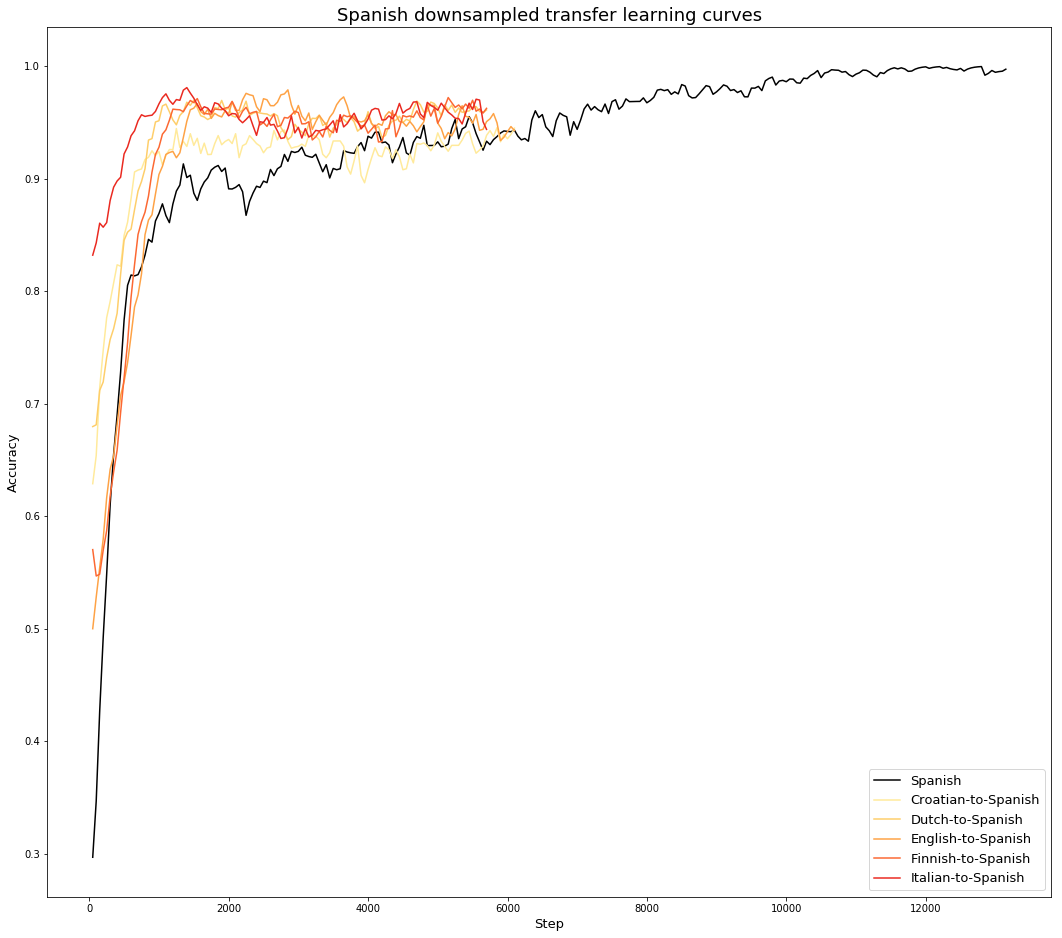

In [13]:
plot_curves(spanish_transfer_learning_ds, 'Spanish downsampled transfer learning curves', palette='YlOrRd',  save_dir='../graphs/smoothed/')

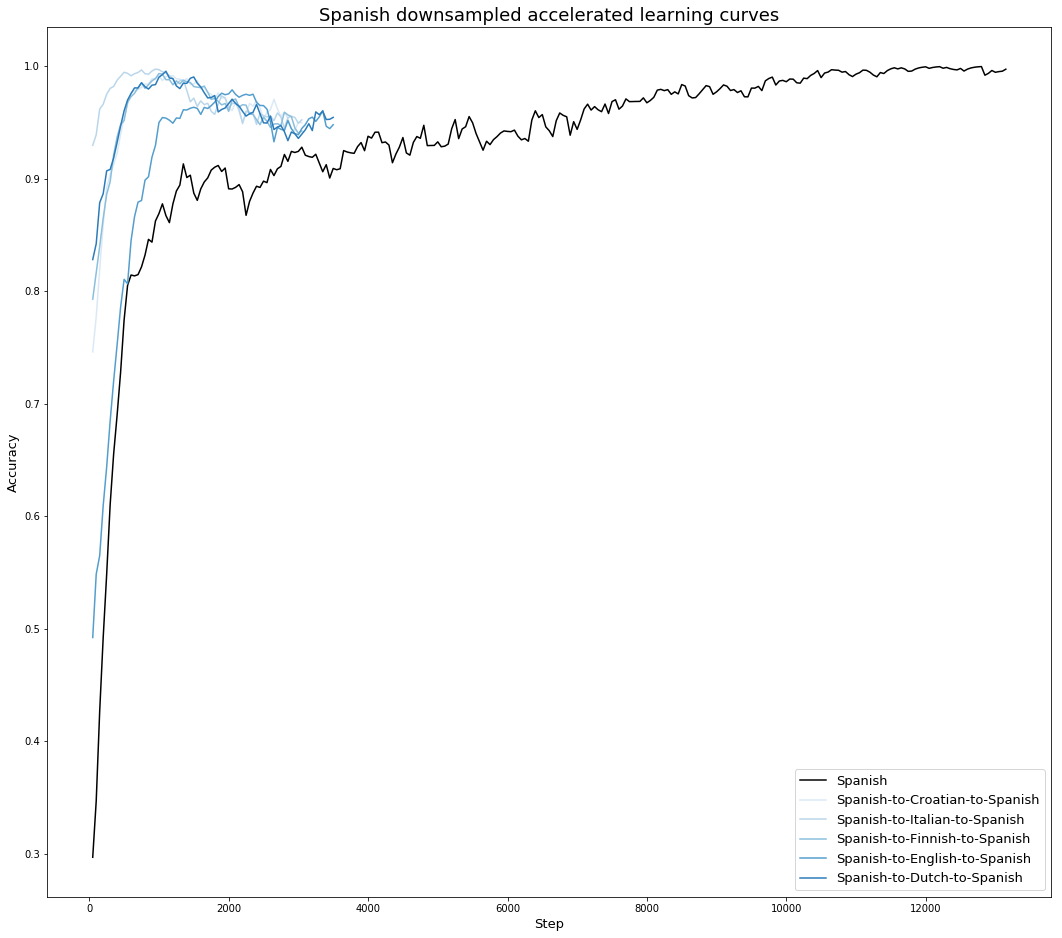

In [14]:
plot_curves(spanish_accelerated_learning_ds, 'Spanish downsampled accelerated learning curves', palette='Blues', save_dir='../graphs/smoothed/')

## Finnish full-data training

In [15]:
finnish_base = pd.read_csv(base_dir + 'finnish-base-train_accuracy.csv')
croatian_to_finnish = pd.read_csv(base_dir + 'croatian-to-finnish-train_accuracy.csv')
dutch_to_finnish = pd.read_csv(base_dir + 'dutch_2finnish.csv')
english_to_finnish = pd.read_csv(base_dir + 'english-to-finnish-train_accuracy.csv')
spanish_to_finnish = pd.read_csv(base_dir + 'spanish-to-finnish-train_accuracy.csv')
italian_to_finnish = pd.read_csv(base_dir + 'italian_2finnish.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_finnish_acc = pd.read_csv(base_dir + 'finnish_croatian2finnish-accelerated_learning.csv')
italian_finnish_acc = pd.read_csv(base_dir + 'finnish_italian2finnish-accelerated_learning.csv')
spanish_finnish_acc = pd.read_csv(base_dir + 'finnish_spanish2finnish-accelerated_learning.csv')
english_finnish_acc = pd.read_csv(base_dir + 'finnish_english2finnish-accelerated_learning.csv')
dutch_finnish_acc = pd.read_csv(base_dir + 'finnish_dutch2finnish-accelerated_learning.csv')

finnish_dfs = [finnish_base, croatian_to_finnish, dutch_to_finnish, english_to_finnish,
               spanish_to_finnish, italian_to_finnish, croatian_finnish_acc, italian_finnish_acc,
               spanish_finnish_acc, english_finnish_acc, dutch_finnish_acc]

In [16]:
labels = ['Finnish', 'Croatian-to-Finnish', 'Dutch-to-Finnish', 'English-to-Finnish', 'Spanish-to-Finnish', 
          'Italian-to-Finnish', 'Finnish-to-Croatian-to-Finnish', 'Finnish-to-Italian-to-Finnish', 
          'Finnish-to-Spanish-to-Finnish', 'Finnish-to-English-to-Finnish', 'Finnish-to-Dutch-to-Finnish']

In [17]:
finnish_dict = dict(zip(labels, finnish_dfs))
finnish_transfer_learning = dict(zip(labels[:6], finnish_dfs[:6]))
finnish_accelerated_learning = dict(zip([labels[0]] + labels[6:], [finnish_dfs[0]] + finnish_dfs[6:]))

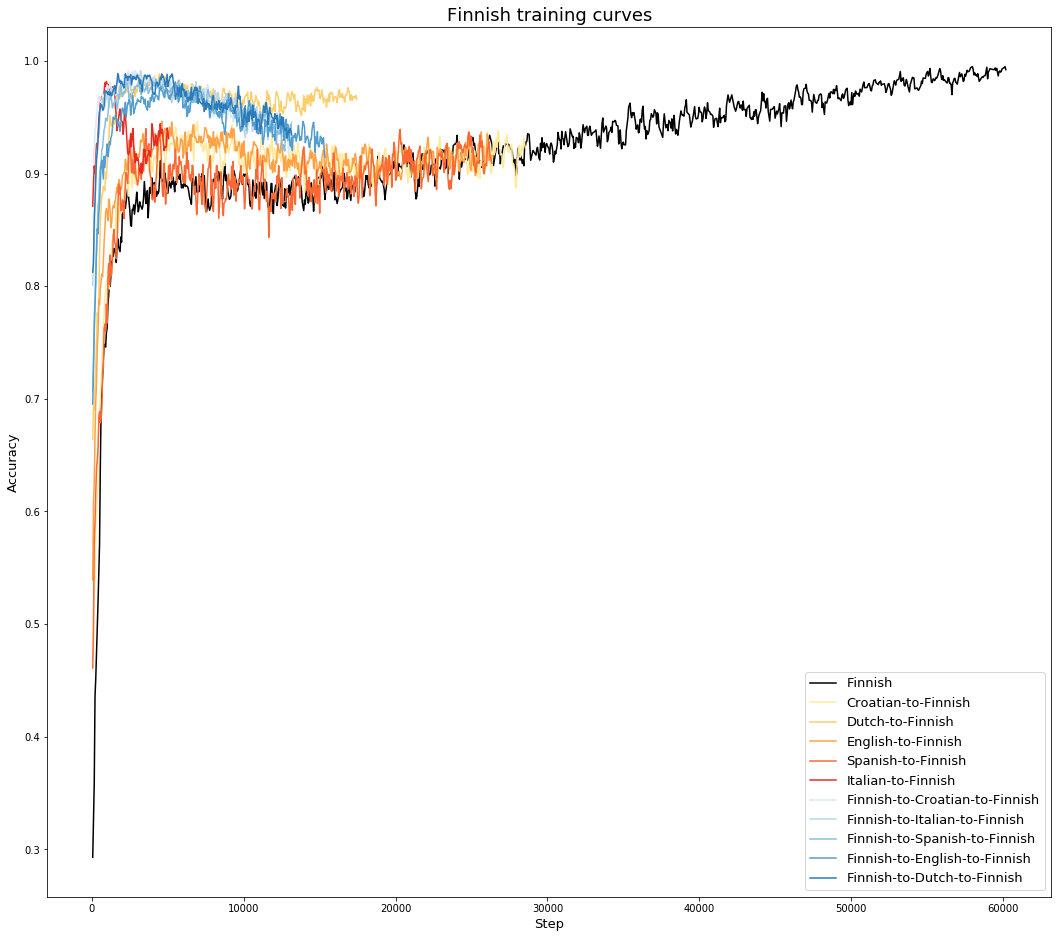

In [18]:
plot_curves(finnish_dict, 'Finnish training curves', save_dir='../graphs/smoothed/')

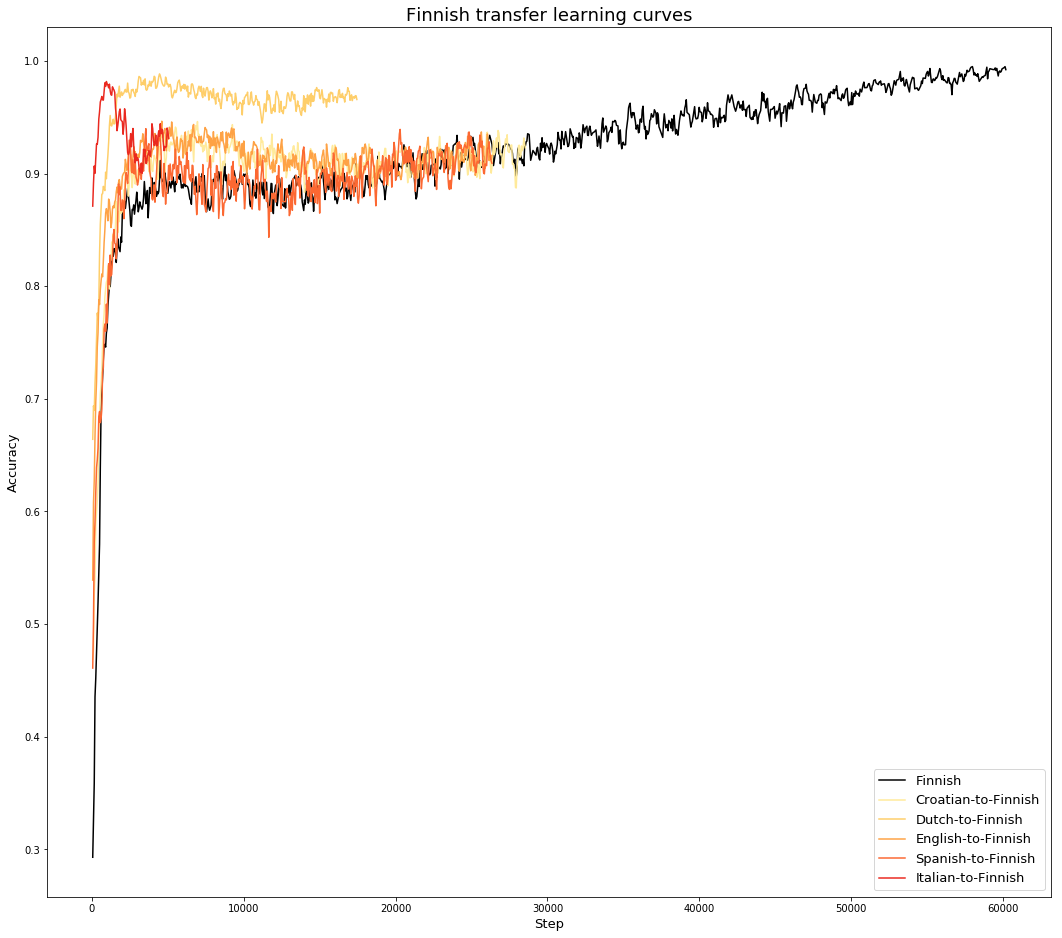

In [19]:
plot_curves(finnish_transfer_learning, 'Finnish transfer learning curves', palette='YlOrRd', save_dir='../graphs/smoothed/')

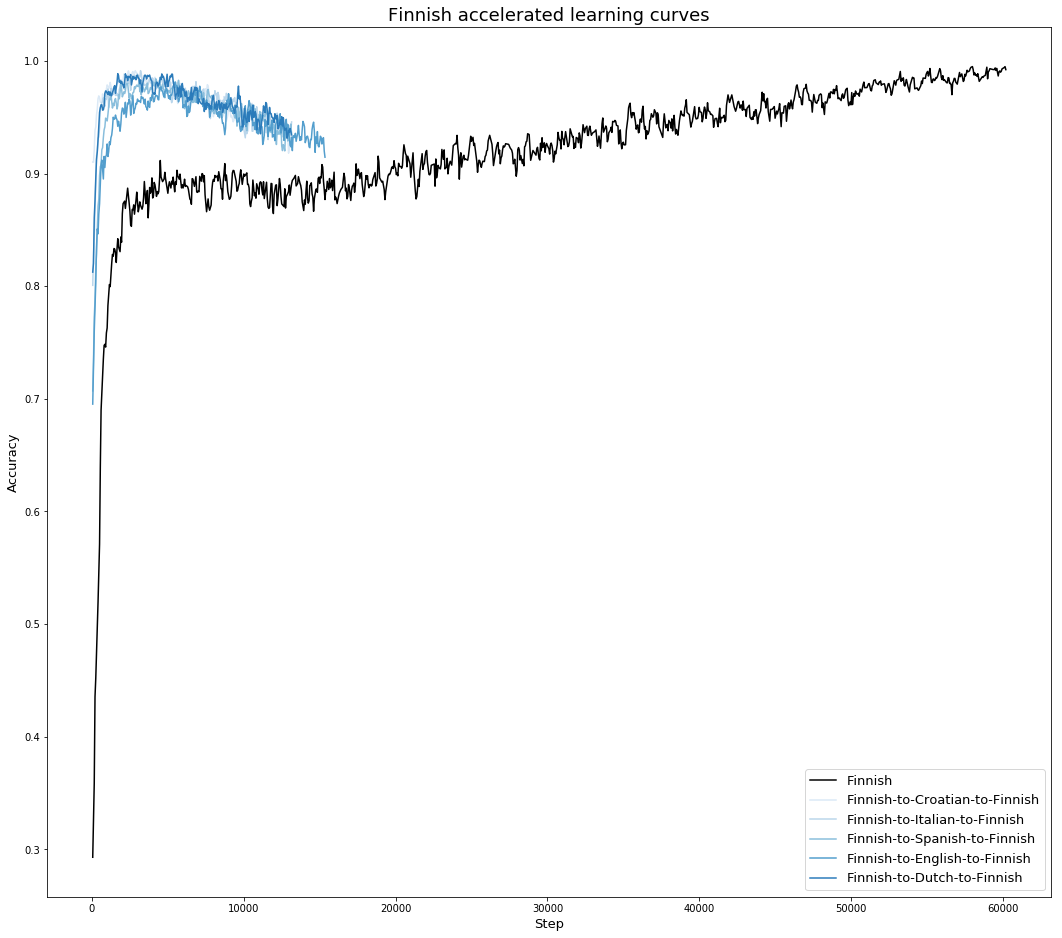

In [20]:
plot_curves(finnish_accelerated_learning, 'Finnish accelerated learning curves', palette='Blues', save_dir='../graphs/smoothed/')

## Finnish downsampled training

In [21]:
finnish_ds = pd.read_csv(downsample_dir + 'finnish-downsample-training.csv')
croatian_to_finnish_ds = pd.read_csv(downsample_dir + 'croatian-to-finnish-downsample-train.csv')
dutch_to_finnish_ds = pd.read_csv(downsample_dir + 'dutch_finnish_step.csv')
english_to_finnish_ds = pd.read_csv(downsample_dir + 'english-to-finnish-downsample-train.csv')
spanish_to_finnish_ds = pd.read_csv(downsample_dir + 'spanish-to-finnish-downsample-train.csv')
italian_to_finnish_ds = pd.read_csv(downsample_dir + 'italian_finnish_Step.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_finnish_acc_ds = pd.read_csv(downsample_dir + 'finnish_croatian2finnish-downsample-accelerated_learning.csv')
italian_finnish_acc_ds = pd.read_csv(downsample_dir + 'finnish_italian2finnish-downsample-accelerated_learning.csv')
spanish_finnish_acc_ds = pd.read_csv(downsample_dir + 'finnish_spanish2finnish-downsample-accelerated_learning.csv')
english_finnish_acc_ds = pd.read_csv(downsample_dir + 'finnish_english2finnish-downsample-accelerated_learning.csv')
dutch_finnish_acc_ds = pd.read_csv(downsample_dir + 'finnish_dutch2finnish-downsample-accelerated_learning.csv')

finnish_dfs_ds = [finnish_ds, croatian_to_finnish_ds, dutch_to_finnish_ds, english_to_finnish_ds,
               spanish_to_finnish_ds, italian_to_finnish_ds, croatian_finnish_acc_ds, italian_finnish_acc_ds,
               spanish_finnish_acc_ds, english_finnish_acc_ds, dutch_finnish_acc_ds]

In [22]:
finnish_dict_ds = dict(zip(labels, finnish_dfs_ds))
finnish_transfer_learning_ds = dict(zip(labels[:6], finnish_dfs_ds[:6]))
finnish_accelerated_learning_ds = dict(zip([labels[0]] + labels[6:], [finnish_dfs_ds[0]] + finnish_dfs_ds[6:]))

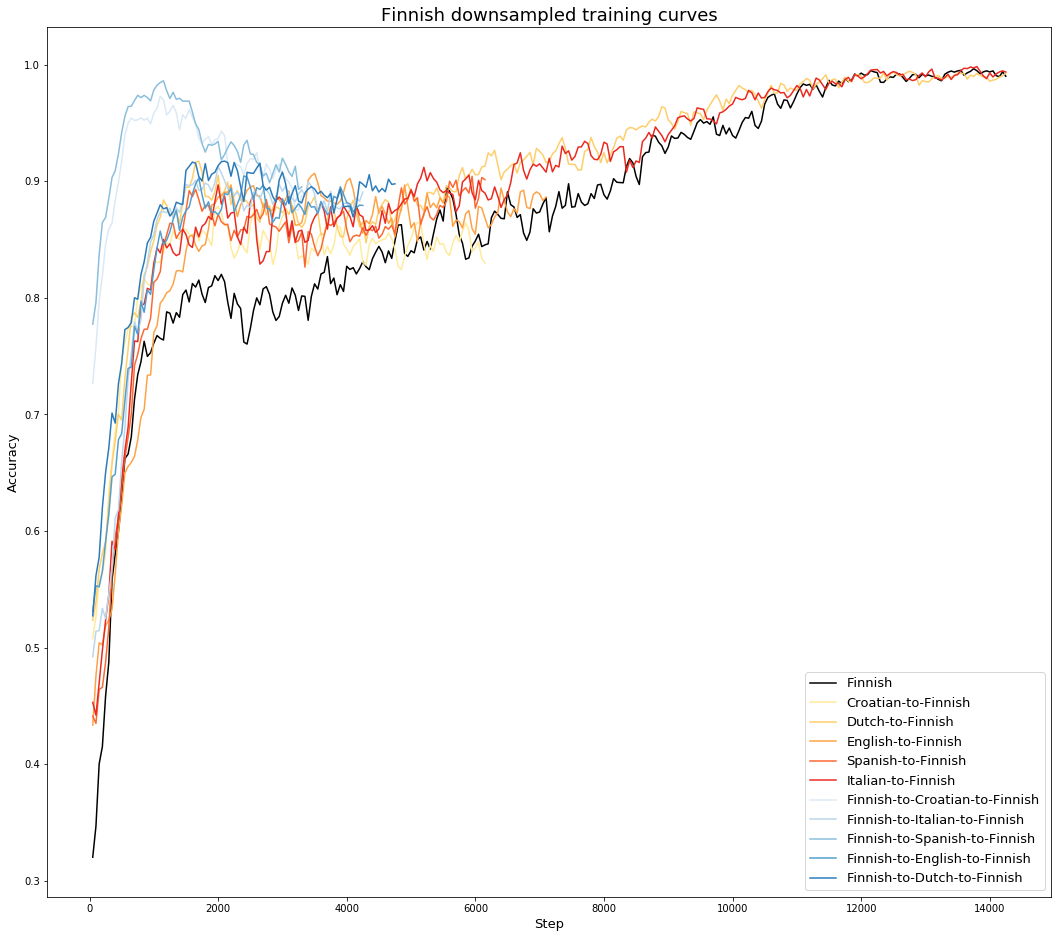

In [23]:
plot_curves(finnish_dict_ds, 'Finnish downsampled training curves', save_dir='../graphs/smoothed/')

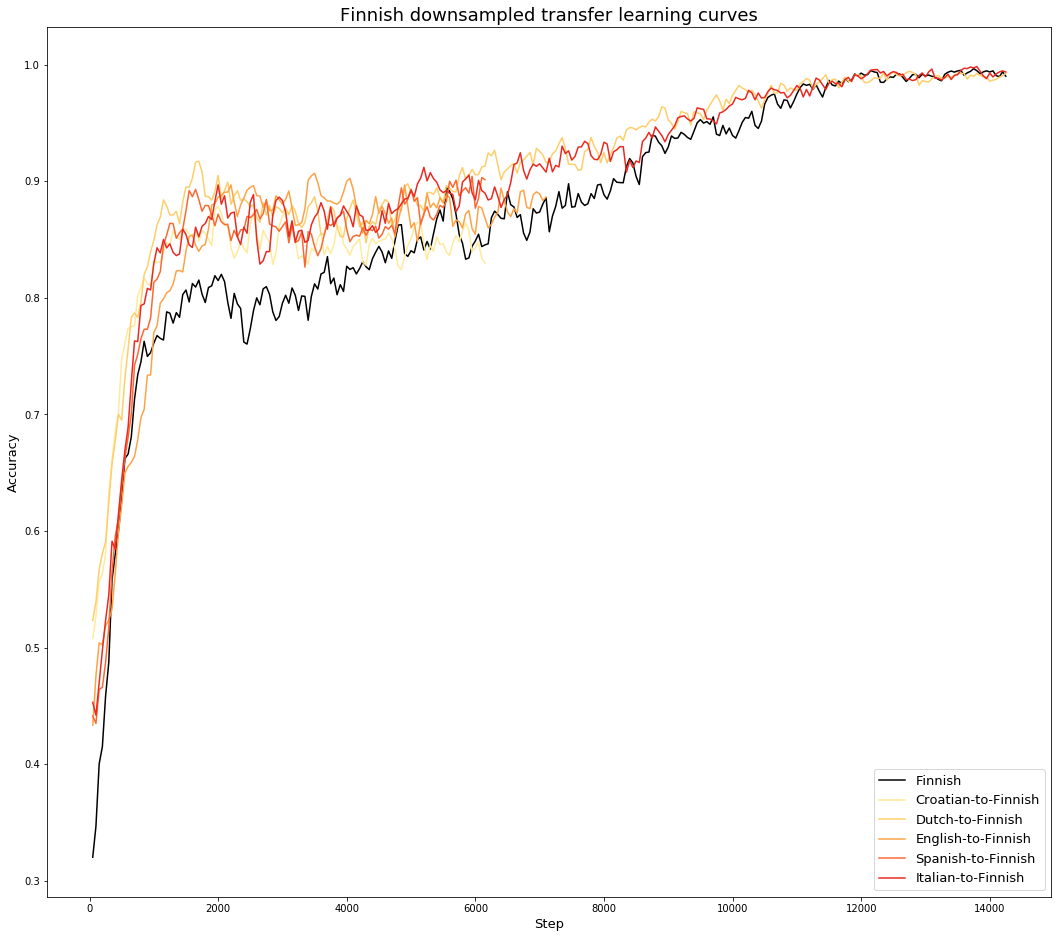

In [24]:
plot_curves(finnish_transfer_learning_ds, 'Finnish downsampled transfer learning curves', palette='YlOrRd', save_dir='../graphs/smoothed/')

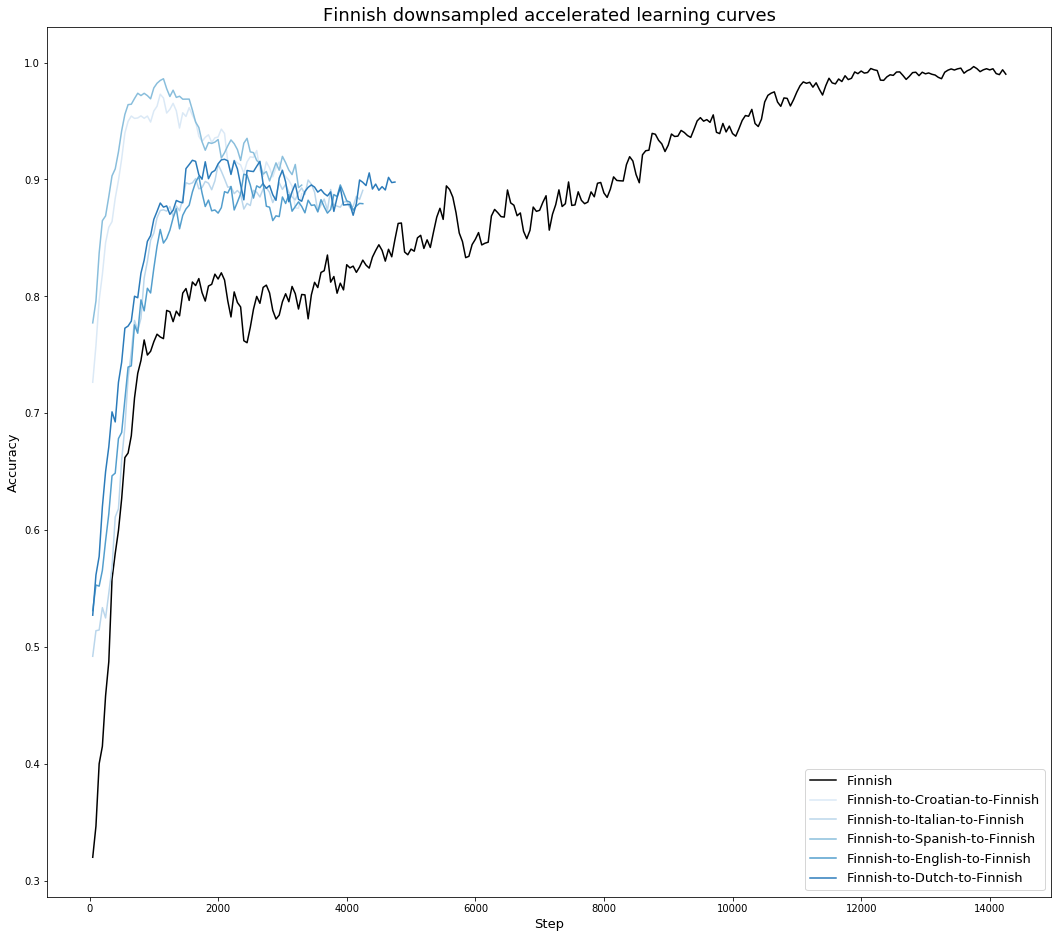

In [25]:
plot_curves(finnish_accelerated_learning_ds, 'Finnish downsampled accelerated learning curves', palette='Blues', save_dir='../graphs/smoothed/')

# Validation

## Spanish full-data validation

In [27]:
base_dir = '../data/validation_curves/base-training/smoothed/'
downsample_dir = '../data/validation_curves/downsampled-training/smoothed/'

In [29]:
spanish_base = pd.read_csv(base_dir + 'spanish-base-validation.csv')
# croatian_to_spanish = pd.read_csv(base_dir + 'croatian-to-spanish-train_accuracy.csv')
dutch_to_spanish = pd.read_csv(base_dir + 'dutch_spanish_val.csv')
# english_to_spanish = pd.read_csv(base_dir + 'english-to-spanish-train_accuracy.csv')
finnish_to_spanish = pd.read_csv(base_dir + 'finnish-to-spanish-validation.csv')
italian_to_spanish = pd.read_csv(base_dir + 'italian_spanish_val.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_spanish_acc = pd.read_csv(base_dir + 'spanish-croatian-spanish-validation.csv')
italian_spanish_acc = pd.read_csv(base_dir + 'spanish-italian-spanish-validation.csv')
finnish_spanish_acc = pd.read_csv(base_dir + 'spanish-finnish-spanish-validation.csv')
english_spanish_acc = pd.read_csv(base_dir + 'spanish-english-spanish-validation.csv')
dutch_spanish_acc = pd.read_csv(base_dir + 'spanish-dutch-spanish-validation.csv')

spanish_dfs = [spanish_base, dutch_to_spanish,
               finnish_to_spanish, italian_to_spanish, croatian_spanish_acc, italian_spanish_acc,
               finnish_spanish_acc, english_spanish_acc, dutch_spanish_acc]

In [30]:
labels = ['Spanish', 'Dutch-to-Spanish', 'Finnish-to-Spanish',
          'Italian-to-Spanish', 'Spanish-to-Croatian-to-Spanish', 'Spanish-to-Italian-to-Spanish', 
          'Spanish-to-Finnish-to-Spanish', 'Spanish-to-English-to-Spanish', 'Spanish-to-Dutch-to-Spanish']

In [31]:
spanish_dict = dict(zip(labels, spanish_dfs))
spanish_transfer_learning = dict(zip(labels[:4], spanish_dfs[:4]))
spanish_accelerated_learning = dict(zip([labels[0]] + labels[4:], [spanish_dfs[0]] + spanish_dfs[4:]))

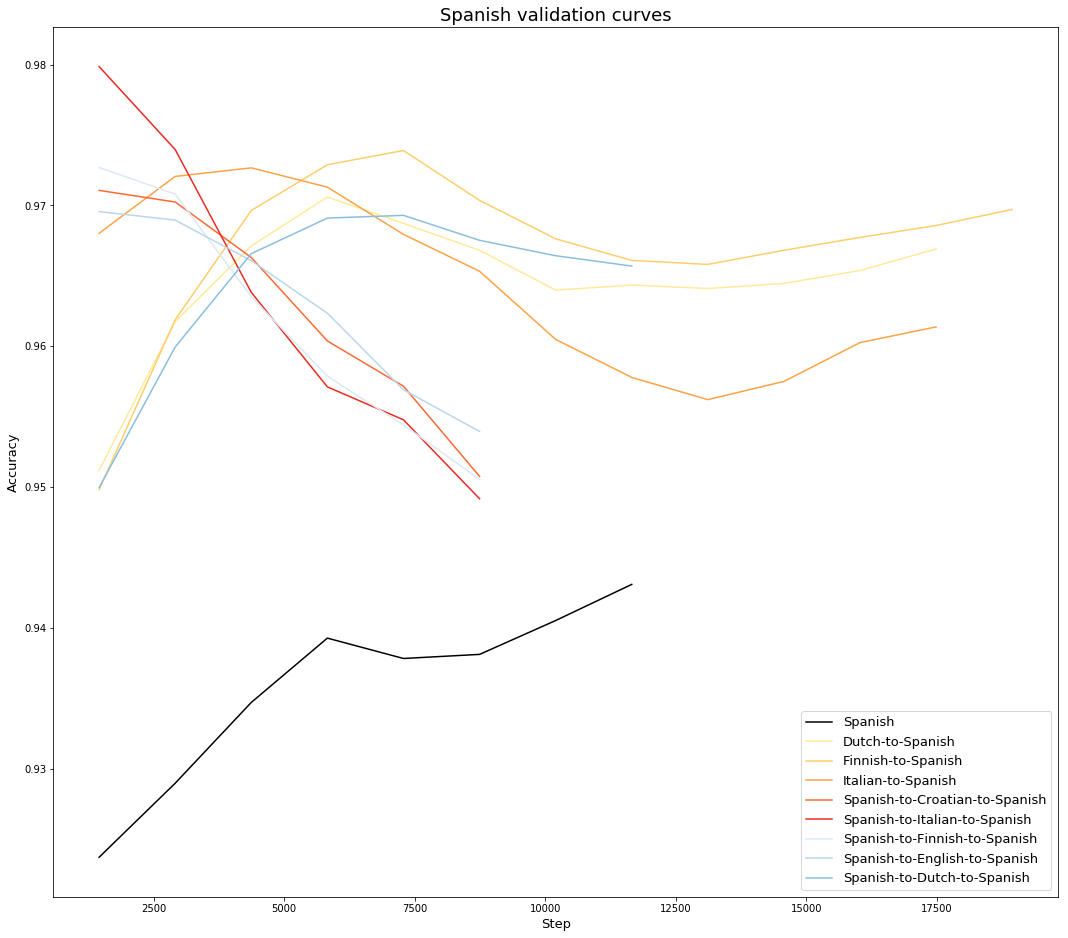

In [32]:
plot_curves(spanish_dict, 'Spanish validation curves', save_dir='../graphs/smoothed/')

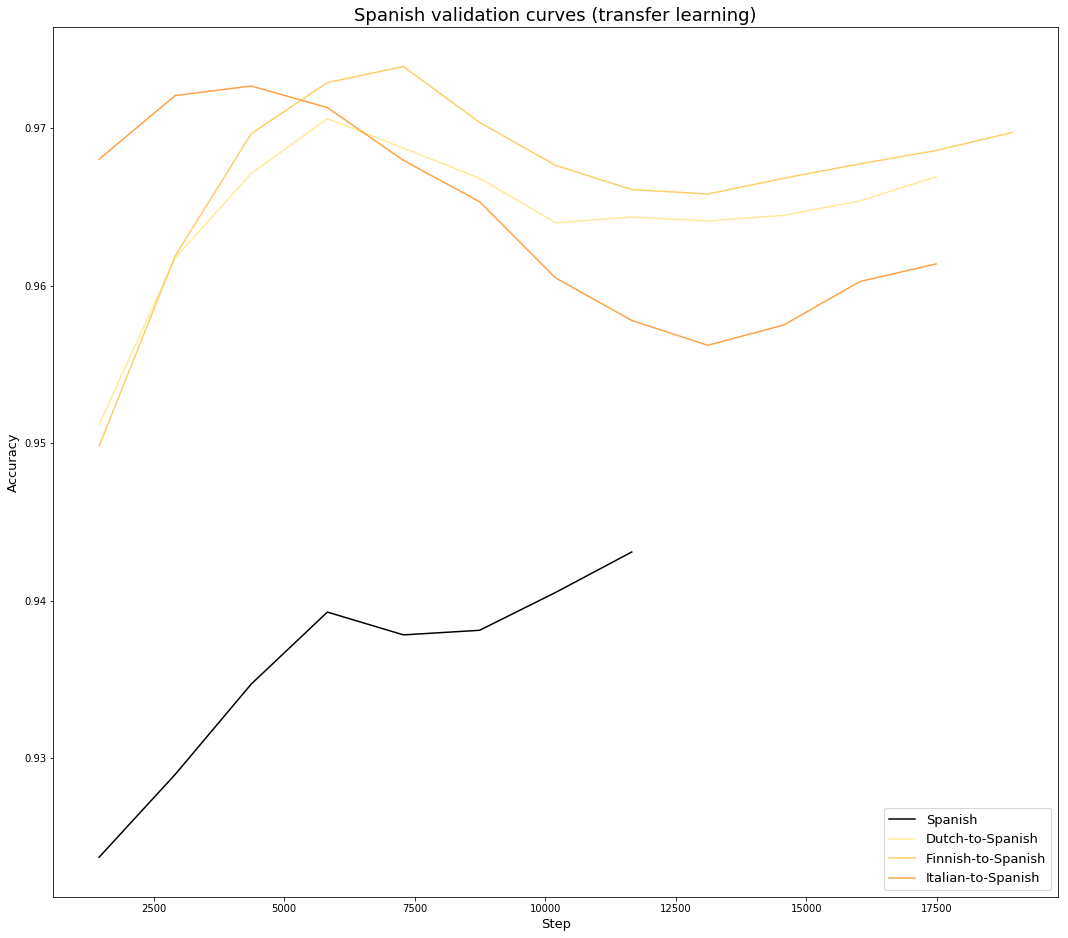

In [35]:
plot_curves(spanish_transfer_learning, 'Spanish validation curves (transfer learning)', palette='YlOrRd', save_dir='../graphs/smoothed/')

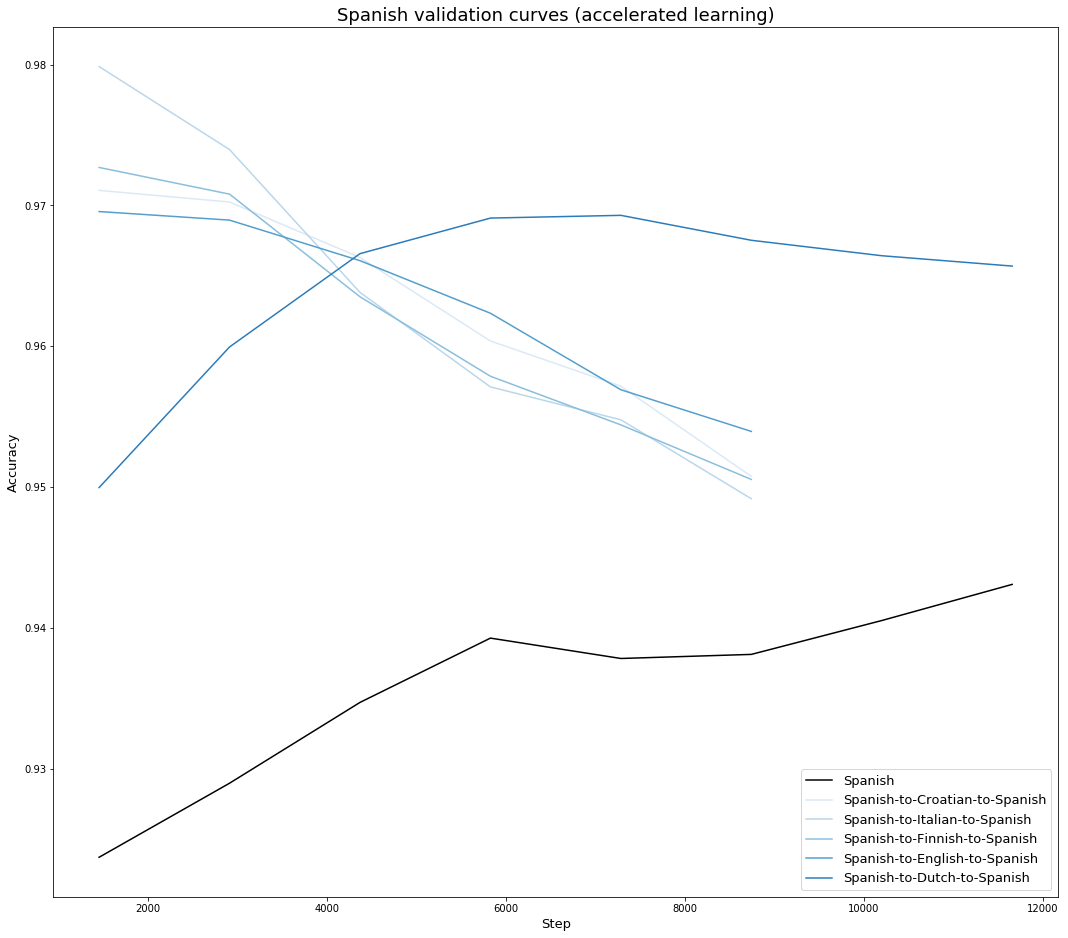

In [36]:
plot_curves(spanish_accelerated_learning, 'Spanish validation curves (accelerated learning)', palette='Blues', save_dir='../graphs/smoothed/')

## spanish downsampled validation

In [38]:
spanish_ds = pd.read_csv(downsample_dir + 'spanish-validation-downsample.csv')
# croatian_to_spanish_ds = pd.read_csv(downsample_dir + 'croatian-to-spanish-downsample-train.csv')
dutch_to_spanish_ds = pd.read_csv(downsample_dir + 'dutch_spanish_val_ds.csv')
# english_to_spanish_ds = pd.read_csv(downsample_dir + 'english-to-spanish-downsample-train.csv')
finnish_to_spanish_ds = pd.read_csv(downsample_dir + 'finnish-to-spanish-validation-downsample.csv')
italian_to_spanish_ds = pd.read_csv(downsample_dir + 'italian_spanish_val_ds.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_spanish_acc_ds = pd.read_csv(downsample_dir + 'spanish-croatian-spanish-validation-downsample.csv')
italian_spanish_acc_ds = pd.read_csv(downsample_dir + 'spanish-italian-spanish-validation-downsample.csv')
finnish_spanish_acc_ds = pd.read_csv(downsample_dir + 'spanish-finnish-spanish-validation-downsample.csv')
english_spanish_acc_ds = pd.read_csv(downsample_dir + 'spanish-english-spanish-validation-downsample.csv')
dutch_spanish_acc_ds = pd.read_csv(downsample_dir + 'spanish-dutch-spanish-validation-downsample.csv')

spanish_dfs_ds = [spanish_ds, dutch_to_spanish_ds,
               finnish_to_spanish_ds, italian_to_spanish_ds, croatian_spanish_acc_ds, italian_spanish_acc_ds,
               finnish_spanish_acc_ds, english_spanish_acc_ds, dutch_spanish_acc_ds]

In [39]:
spanish_dict = dict(zip(labels, spanish_dfs_ds))
spanish_transfer_learning = dict(zip(labels[:4], spanish_dfs_ds[:4]))
spanish_accelerated_learning = dict(zip([labels[0]] + labels[4:], [spanish_dfs_ds[0]] + spanish_dfs_ds[4:]))

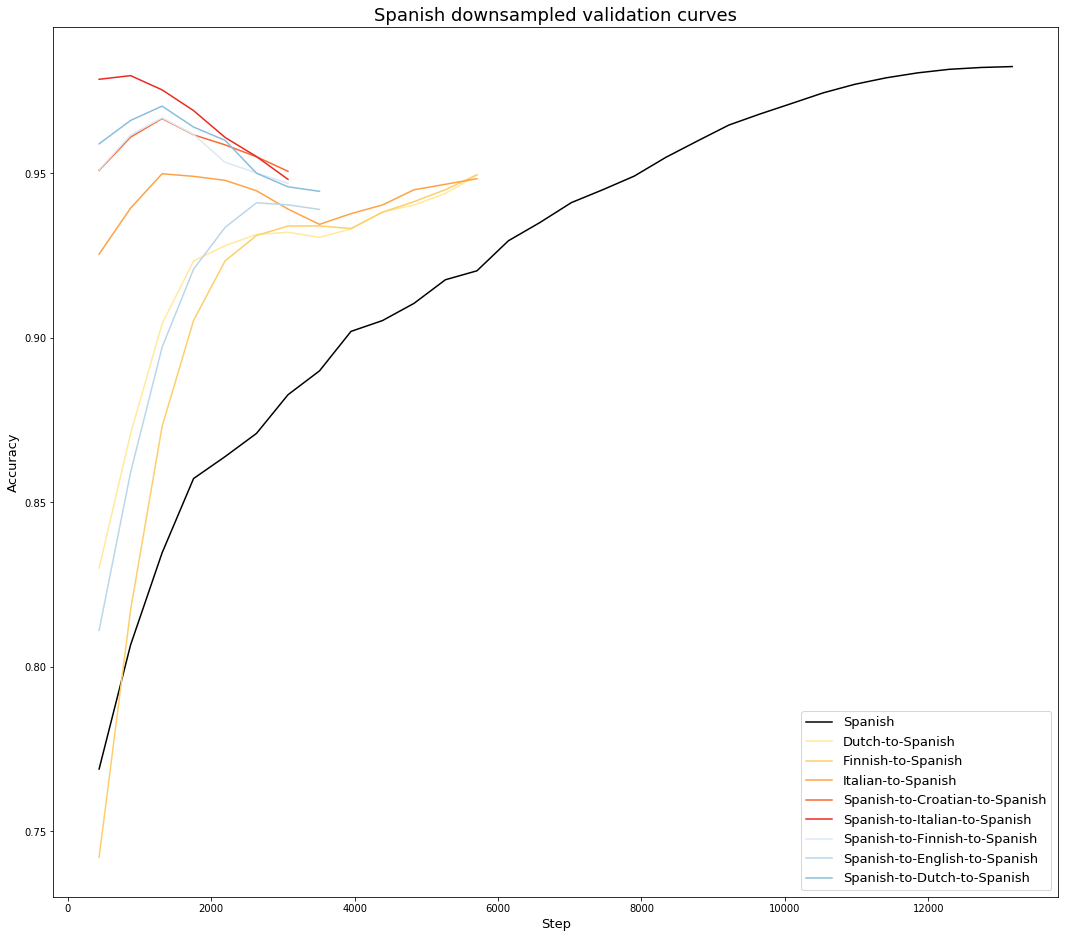

In [40]:
plot_curves(spanish_dict, 'Spanish downsampled validation curves', save_dir='../graphs/smoothed/')

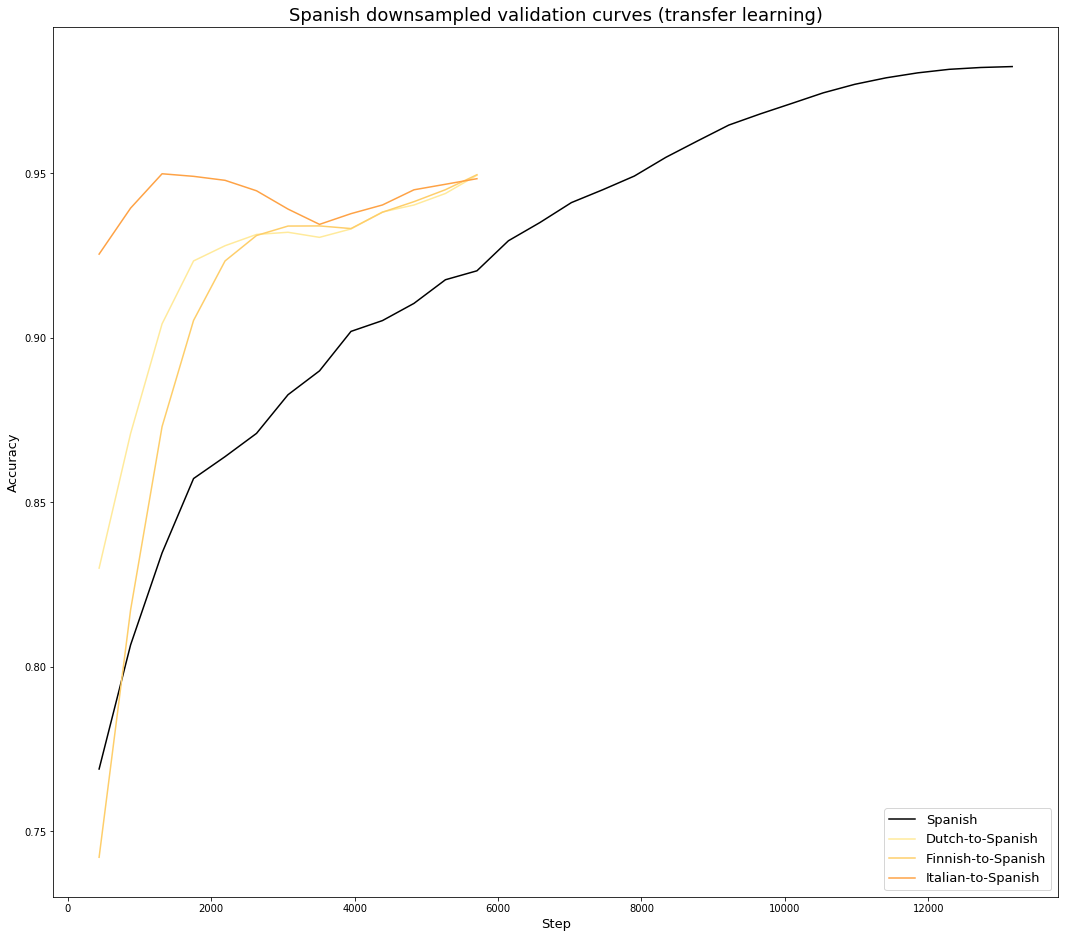

In [41]:
plot_curves(spanish_transfer_learning, 'Spanish downsampled validation curves (transfer learning)', palette='YlOrRd', save_dir='../graphs/smoothed/')

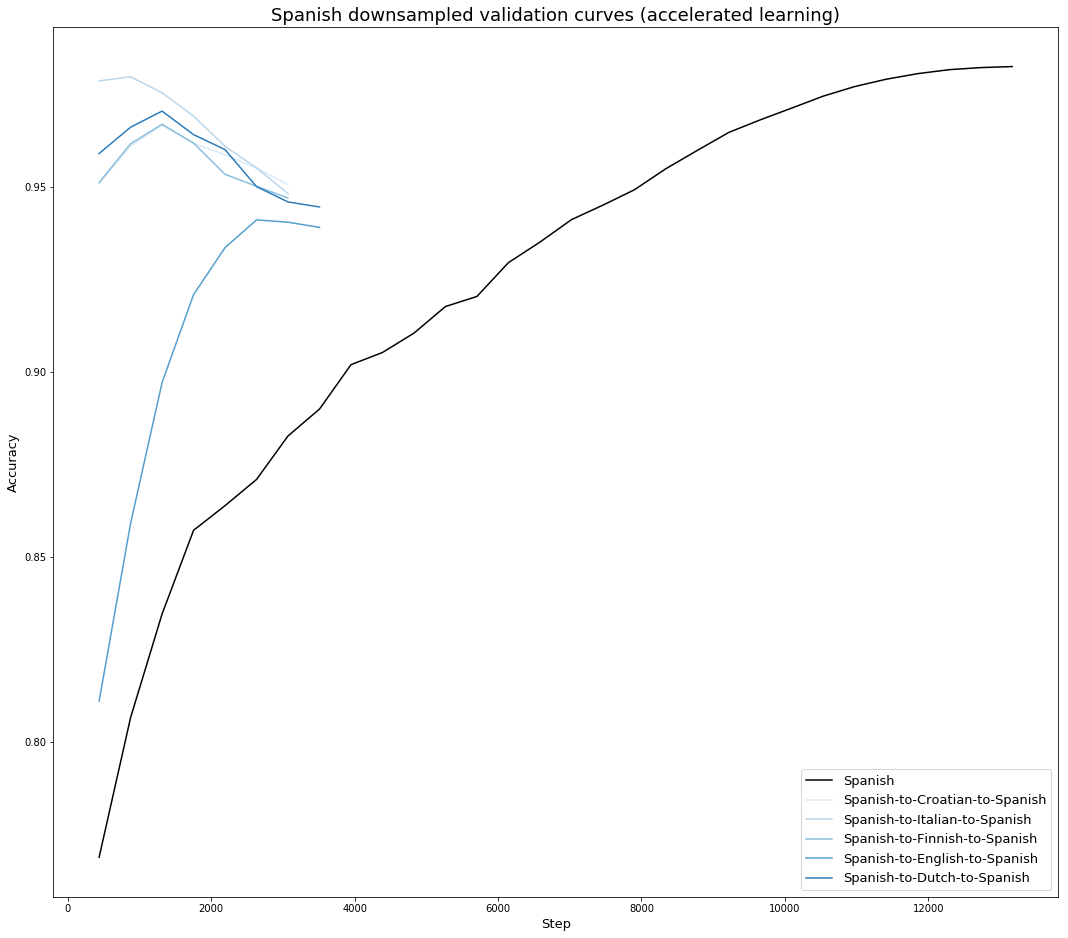

In [43]:
plot_curves(spanish_accelerated_learning, 'Spanish downsampled validation curves (accelerated learning)', palette='Blues', save_dir='../graphs/smoothed/')

## Finnish validation curves

In [45]:
finnish_base = pd.read_csv(base_dir + 'finnish-base-validation.csv')
# croatian_to_finnish = pd.read_csv(base_dir + 'croatian-to-finnish-train_accuracy.csv')
dutch_to_finnish = pd.read_csv(base_dir + 'dutch_finnish_val.csv')
# english_to_finnish = pd.read_csv(base_dir + 'english-to-finnish-train_accuracy.csv')
spanish_to_finnish = pd.read_csv(base_dir + 'spanish-to-finnish-validation.csv')
italian_to_finnish = pd.read_csv(base_dir + 'italian_finnish_val.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_finnish_acc = pd.read_csv(base_dir + 'finnish-croatian-finnish-validation.csv')
italian_finnish_acc = pd.read_csv(base_dir + 'finnish-italian-finnish-validation.csv')
spanish_finnish_acc = pd.read_csv(base_dir + 'finnish-spanish-finnish-validation.csv')
english_finnish_acc = pd.read_csv(base_dir + 'finnish-english-finnish-validation.csv')
dutch_finnish_acc = pd.read_csv(base_dir + 'finnish-dutch-finnish-validation.csv')

finnish_dfs = [finnish_base, dutch_to_finnish,
               spanish_to_finnish, italian_to_finnish, croatian_finnish_acc, italian_finnish_acc,
               spanish_finnish_acc, english_finnish_acc, dutch_finnish_acc]

In [46]:
labels = ['Finnish', 'Dutch-to-Finnish', 'Spanish-to-Finnish', 
          'Italian-to-Finnish', 'Finnish-to-Croatian-to-Finnish', 'Finnish-to-Italian-to-Finnish', 
          'Finnish-to-Spanish-to-Finnish', 'Finnish-to-English-to-Finnish', 'Finnish-to-Dutch-to-Finnish']

In [47]:
finnish_dict = dict(zip(labels, finnish_dfs))
finnish_transfer_learning = dict(zip(labels[:4], finnish_dfs[:4]))
finnish_accelerated_learning = dict(zip([labels[0]] + labels[4:], [finnish_dfs[0]] + finnish_dfs[4:]))

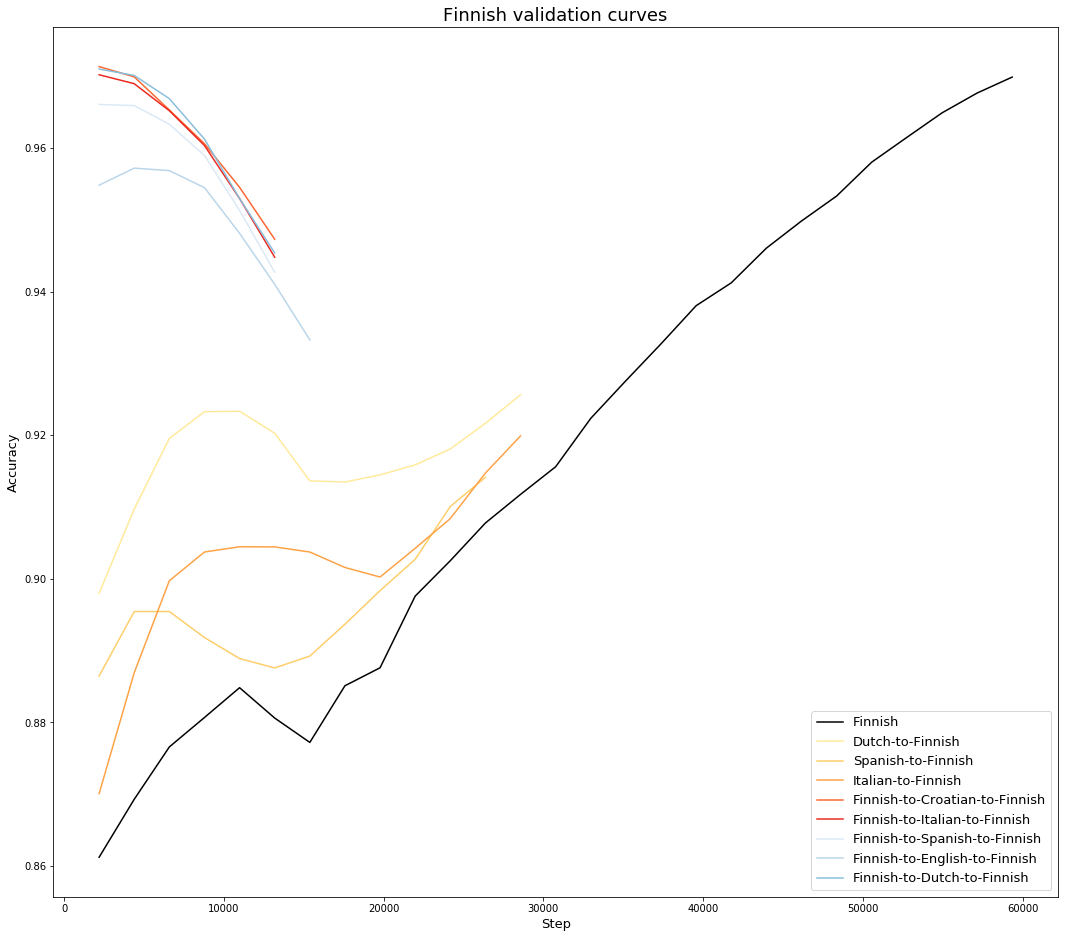

In [48]:
plot_curves(finnish_dict, 'Finnish validation curves', save_dir='../graphs/smoothed/')

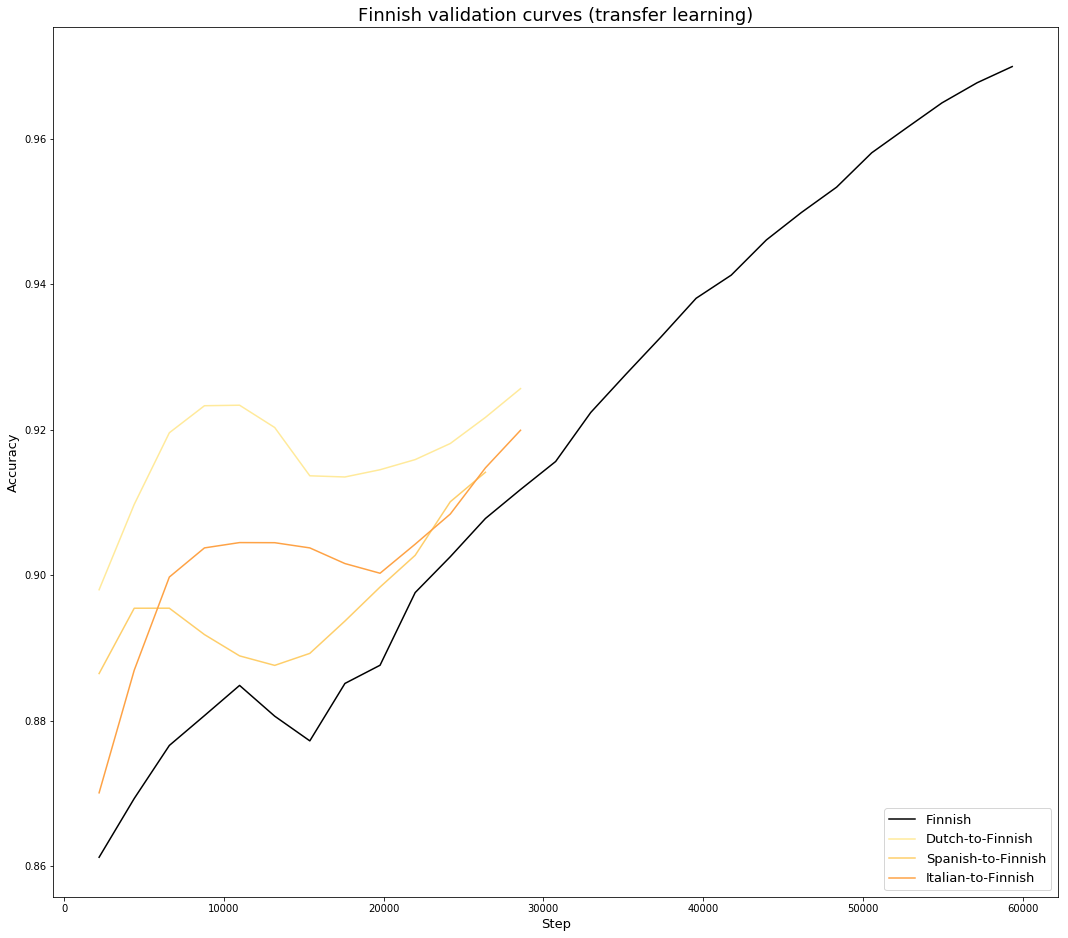

In [49]:
plot_curves(finnish_transfer_learning, 'Finnish validation curves (transfer learning)', palette='YlOrRd', save_dir='../graphs/smoothed/')

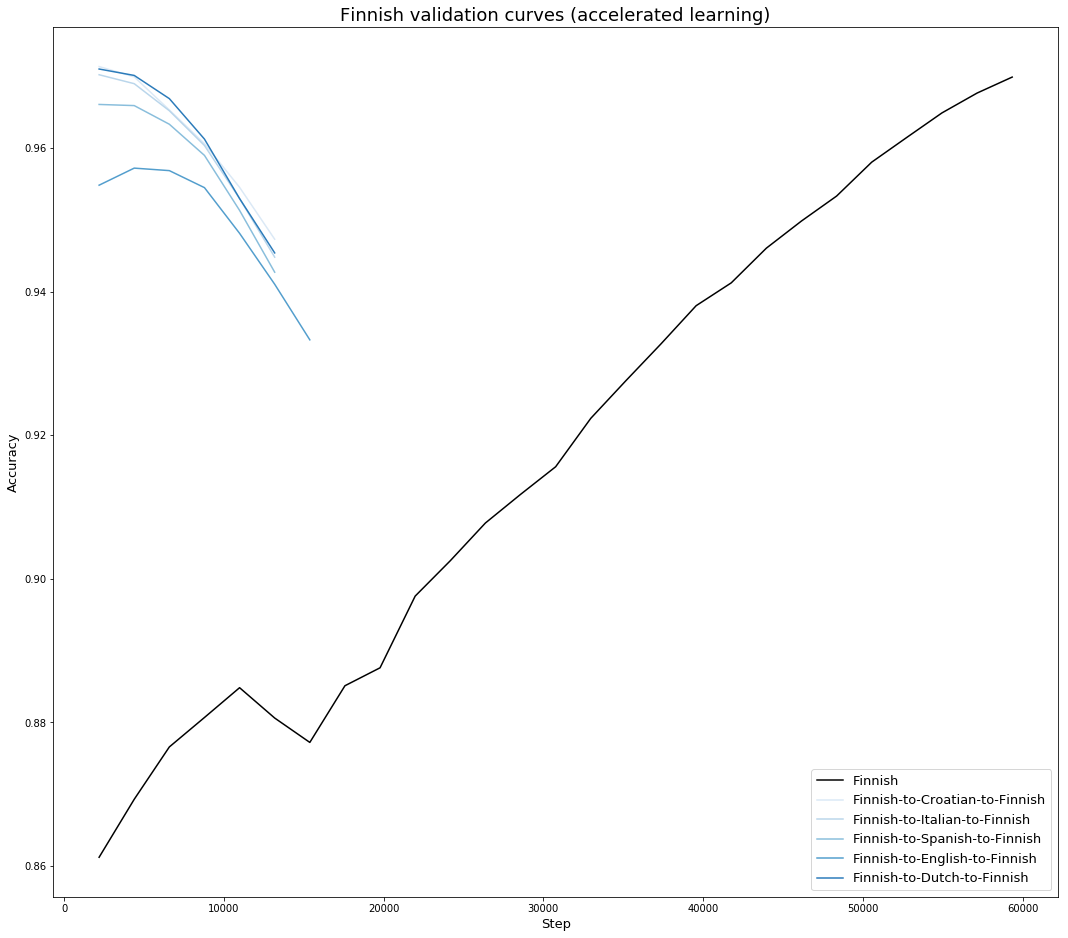

In [50]:
plot_curves(finnish_accelerated_learning, 'Finnish validation curves (accelerated learning)', palette='Blues', save_dir='../graphs/smoothed/')

## Finnish downsampled validation curves

In [51]:
finnish_ds = pd.read_csv(downsample_dir + 'finnish-validation-downsample.csv')
# croatian_to_finnish_ds = pd.read_csv(downsample_dir + 'croatian-to-finnish-downsample-train.csv')
dutch_to_finnish_ds = pd.read_csv(downsample_dir + 'dutch_finnish_val_ds.csv')
# english_to_finnish_ds = pd.read_csv(downsample_dir + 'english-to-finnish-downsample-train.csv')
spanish_to_finnish_ds = pd.read_csv(downsample_dir + 'spanish-to-finnish-validation-downsample.csv')
italian_to_finnish_ds = pd.read_csv(downsample_dir + 'italian_finnish_val_ds.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_finnish_acc_ds = pd.read_csv(downsample_dir + 'finnish-croatian-finnish-validation-downsample.csv')
italian_finnish_acc_ds = pd.read_csv(downsample_dir + 'finnish-italian-finnish-validation-downsample.csv')
spanish_finnish_acc_ds = pd.read_csv(downsample_dir + 'finnish-spanish-finnish-validation-downsample.csv')
english_finnish_acc_ds = pd.read_csv(downsample_dir + 'finnish-english-finnish-validation-downsample.csv')
dutch_finnish_acc_ds = pd.read_csv(downsample_dir + 'finnish-dutch-finnish-validation-downsample.csv')

finnish_dfs_ds = [finnish_ds, dutch_to_finnish_ds,
               spanish_to_finnish_ds, italian_to_finnish_ds, croatian_finnish_acc_ds, italian_finnish_acc_ds,
               spanish_finnish_acc_ds, english_finnish_acc_ds, dutch_finnish_acc_ds]

In [52]:
finnish_dict_ds = dict(zip(labels, finnish_dfs_ds))
finnish_transfer_learning_ds = dict(zip(labels[:4], finnish_dfs_ds[:4]))
finnish_accelerated_learning_ds = dict(zip([labels[0]] + labels[4:], [finnish_dfs_ds[0]] + finnish_dfs_ds[4:]))

In [ ]:
plot_curves(finnish_dict_ds, 'Finnish validation curves', save_dir='../graphs/smoothed/')